In [1]:
import os
import string
import numpy as np
from bitstring import Bits
import matplotlib.pyplot as plt

In [2]:
# Ideal conversion gain
# CONVERSION_GAIN = 0.5/256

# w/ gain calibration
CONVERSION_GAIN = 0.5/(256 + 37)

INPUT_RANGE_CUT = [65, 65]

In [3]:
DATAPATH = "data"
data = []

with open(os.path.join(DATAPATH, "ideal_INL.csv")) as f:
    data = f.readlines()

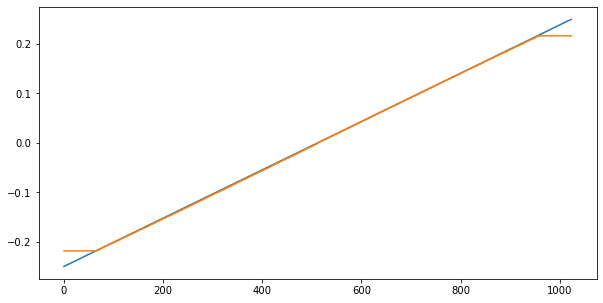

In [4]:
processed_data = np.zeros(shape=(len(data) - 1, 2))

for i in range(1, len(data)):
    temp = data[i].split(",0b")
    processed_data[i - 1, 0] = float(temp[0])
    processed_data[i - 1, 1] = CONVERSION_GAIN * Bits(bin=temp[1]).int

#print(processed_data)
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(processed_data)
plt.show()

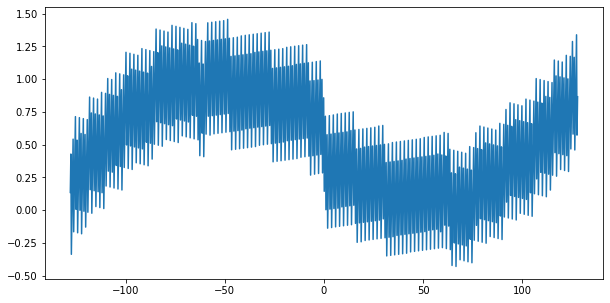

In [5]:
integrated_nonlinearity = np.zeros_like(processed_data)
for i in range(len(processed_data)):
    integrated_nonlinearity[i, 0] = processed_data[i, 0]
    integrated_nonlinearity[i, 1] = processed_data[i, 0] - processed_data[i, 1]

plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(
    integrated_nonlinearity[INPUT_RANGE_CUT[0]:-INPUT_RANGE_CUT[1],0] / CONVERSION_GAIN,
    integrated_nonlinearity[INPUT_RANGE_CUT[0]:-INPUT_RANGE_CUT[1],1] / CONVERSION_GAIN)
plt.show()